
Contents:

1.) Exploratory Data Analysis

    1.1) Relationship with Numeric Variables
    1.2) Relationship with Categorical Variables

2.) Feature Engineering

    2.1) For Categorical Variables
    2.2) For Numerical Variables

3) Recursive Feature Engineering (Dimensionality Reduction)

    3.1) RFE (LogisticRegression)
    3.2) RFE (RandomForestClassifier)
    3.3) RFE (DecisionTreeClassifier)
    3.4) RFE (AdaBoostClassifier)

4.) Simple Model

    Try different models & check accuracy with classification metrics

5.) Solving data imbalanced problem

    Resampling techniques & Ensemble Methods

6) Hypertuning Parameters

    6.1) Hypertuning LogisticRegression
    6.2) Hypertuning AdaBoostClassifier

7) Final apply on test data for sample submission¶


In [1]:
# import libraries

import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, KFold
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

%cd D:\IPython Jupyter\Analytics Vidya Datasets


[Errno 2] No such file or directory: 'D:IPython JupyterAnalytics Vidya Datasets'
/home/chuka19952/Documents/Competitions/zindi/xente credit card fraud detection


In [2]:
df = pd.read_csv('training.csv')
test =  pd.read_csv('test.csv')
xente_desc=pd.read_csv("Xente_Variable_Definitions.csv")
print(df.shape, df.columns)
df.head()

(95662, 16) Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


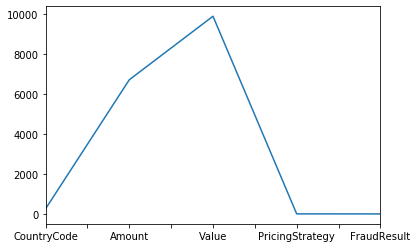

In [3]:
df.mean().plot(style='')

In [4]:
#we want to check if data elements are all unique
len(df.nunique(axis=1)==1), len(df.nunique(axis=0)==1)   #for rows   ,  #for columns
  

#if the row or column output here is equal to your original row/output, then they are unique else they are duplicates

(95662, 16)

data rows are all unique

In [5]:
#dropping duplicate columns
df.T.drop_duplicates()

,0,1,2,3,4,5,6,7,8,9,...,95652,95653,95654,95655,95656,95657,95658,95659,95660,95661
TransactionId,TransactionId_76871,TransactionId_73770,TransactionId_26203,TransactionId_380,TransactionId_28195,TransactionId_23223,TransactionId_118063,TransactionId_100640,TransactionId_51905,TransactionId_130161,...,TransactionId_71994,TransactionId_68851,TransactionId_18130,TransactionId_38907,TransactionId_68402,TransactionId_89881,TransactionId_91597,TransactionId_82501,TransactionId_136354,TransactionId_35670
BatchId,BatchId_36123,BatchId_15642,BatchId_53941,BatchId_102363,BatchId_38780,BatchId_25954,BatchId_118460,BatchId_38561,BatchId_93774,BatchId_82409,...,BatchId_66957,BatchId_100900,BatchId_20310,BatchId_92168,BatchId_17092,BatchId_96668,BatchId_3503,BatchId_118602,BatchId_70924,BatchId_29317
AccountId,AccountId_3957,AccountId_4841,AccountId_4229,AccountId_648,AccountId_4841,AccountId_1078,AccountId_2442,AccountId_4841,AccountId_272,AccountId_710,...,AccountId_620,AccountId_4841,AccountId_620,AccountId_4841,AccountId_2659,AccountId_4841,AccountId_3439,AccountId_4841,AccountId_1346,AccountId_4841
SubscriptionId,SubscriptionId_887,SubscriptionId_3829,SubscriptionId_222,SubscriptionId_2185,SubscriptionId_3829,SubscriptionId_4238,SubscriptionId_1980,SubscriptionId_3829,SubscriptionId_4731,SubscriptionId_920,...,SubscriptionId_1833,SubscriptionId_3829,SubscriptionId_1833,SubscriptionId_3829,SubscriptionId_3327,SubscriptionId_3829,SubscriptionId_2643,SubscriptionId_3829,SubscriptionId_652,SubscriptionId_3829
CustomerId,CustomerId_4406,CustomerId_4406,CustomerId_4683,CustomerId_988,CustomerId_988,CustomerId_1432,CustomerId_2858,CustomerId_2858,CustomerId_598,CustomerId_1053,...,CustomerId_960,CustomerId_539,CustomerId_960,CustomerId_960,CustomerId_3078,CustomerId_3078,CustomerId_3874,CustomerId_3874,CustomerId_1709,CustomerId_1709
CurrencyCode,UGX,UGX,UGX,UGX,UGX,UGX,UGX,UGX,UGX,UGX,...,UGX,UGX,UGX,UGX,UGX,UGX,UGX,UGX,UGX,UGX
CountryCode,256,256,256,256,256,256,256,256,256,256,...,256,256,256,256,256,256,256,256,256,256
ProviderId,ProviderId_6,ProviderId_4,ProviderId_6,ProviderId_1,ProviderId_4,ProviderId_6,ProviderId_5,ProviderId_4,ProviderId_6,ProviderId_1,...,ProviderId_1,ProviderId_4,ProviderId_6,ProviderId_4,ProviderId_6,ProviderId_4,ProviderId_6,ProviderId_4,ProviderId_6,ProviderId_4
ProductId,ProductId_10,ProductId_6,ProductId_1,ProductId_21,ProductId_6,ProductId_3,ProductId_3,ProductId_6,ProductId_10,ProductId_15,...,ProductId_15,ProductId_6,ProductId_1,ProductId_6,ProductId_10,ProductId_6,ProductId_10,ProductId_6,ProductId_19,ProductId_6
ProductCategory,airtime,financial_services,airtime,utility_bill,financial_services,airtime,airtime,financial_services,airtime,financial_services,...,financial_services,financial_services,airtime,financial_services,airtime,financial_services,airtime,financial_services,tv,financial_services


didnt drop aything which means the were no duplicate rows as earlier observed

In [3]:
#creating new columns #notice i used 30 in order to capture all other values towards the end of the strings
df['TransidNew']= df.TransactionId.str.slice(14,30).astype(int)
df['BatchidNew']= df.BatchId.str.slice(8,30).astype(int)
df['AccountidNew']= df.AccountId.str.slice(10,30).astype(int)
df['SubidNew']= df.SubscriptionId.str.slice(15,30).astype(int)
df['CusidNew']= df.CustomerId.str.slice(11,30).astype(int)
df['ProvidNew']= df.ProviderId.str.slice(-1).astype(int)
df['ProdidNew']= df.ProductId.str.slice(10,30).astype(int)

In [4]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,TransactionStartTime,PricingStrategy,FraudResult,TransidNew,BatchidNew,AccountidNew,SubidNew,CusidNew,ProvidNew,ProdidNew
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,2018-11-15T02:18:49Z,2,0,76871,36123,3957,887,4406,6,10
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2018-11-15T02:19:08Z,2,0,73770,15642,4841,3829,4406,4,6
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,2018-11-15T02:44:21Z,2,0,26203,53941,4229,222,4683,6,1
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,2018-11-15T03:32:55Z,2,0,380,102363,648,2185,988,1,21
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,2018-11-15T03:34:21Z,2,0,28195,38780,4841,3829,988,4,6


In [5]:
#CREATING A NEW FEATURE ON 
df["TransactionType"]=df["Amount"]

#CONVERTS NEGATIVE NUMBERS TO STRINGS FOR CATEGORICAL USES:
df["TransactionType"].loc[df["TransactionType"]<0]="credit"

#CONVERTS NEGATIVE NUMBERS TO STRINGS FOR CATEGORICAL USES:
#xente_train["TransactionType"].loc[xente_train["TransactionType"]>0]="credit"
#couldnt apply same code used for -ve values on the +ve values cos: "TypeError: '>' not supported between instances of 'str' and 'int'"
ttyy=DataFrame(df["TransactionType"])
credit="credit"
def loc():
    ttyy.loc[ttyy["TransactionType"] !=credit ] = "debit"
loc()   #BOOOM!!!! WOOOOWW!! THIS WORKED!!!

#NOW WE WOULD GO AHEAD TO UPDATE THE COLUMN :"TransactionType" IN OUR MAIN TABLE/DATASET
df["TransactionType"]=ttyy["TransactionType"]


In [6]:
#creating a new feature by doing a frequency encoding of categorical features
prdc = df.groupby('ProductCategory').size()
df['prodcat_group']=df['ProductCategory'].map(prdc)

btch = df.groupby('BatchId').size()
df['btchid_group']=df['BatchId'].map(btch)

chnlid = df.groupby('ChannelId').size()
df['chlid_group']=df['ChannelId'].map(chnlid)

proddid = df.groupby('ProductId').size()
df['proddiid_group']=df['ProductId'].map(proddid)

subddid = df.groupby('SubscriptionId').size()
df['suboddiid_group']=df['SubscriptionId'].map(subddid)

actddid = df.groupby('AccountId').size()
df['acctddiid_group']=df['AccountId'].map(actddid)

custddid = df.groupby('CustomerId').size()
df['custddiid_group']=df['CustomerId'].map(custddid)

provddid = df.groupby('ProviderId').size()
df['provddiid_group']=df['ProviderId'].map(provddid)

pricestrt = df.groupby('PricingStrategy').size()
df['pricingstrt_group']=df['PricingStrategy'].map(pricestrt)

transtyp = df.groupby('TransactionType').size()
df['transtyp_group']=df['TransactionType'].map(transtyp)


In [7]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,prodcat_group,btchid_group,chlid_group,proddiid_group,suboddiid_group,acctddiid_group,custddiid_group,provddiid_group,pricingstrt_group,transtyp_group
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,45027,1,56935,15384,66,66,119,34186,79848,57473
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,45405,1,37141,32635,32630,30893,119,38189,79848,38189
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,45027,1,56935,2885,2,2,2,34186,79848,57473
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,1920,1,56935,1512,26,26,38,5643,79848,57473
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,45405,1,37141,32635,32630,30893,38,38189,79848,38189


# 1.) Exploratory Data Analysis

In [8]:
# Missing value in data
df.isnull().sum().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 34 columns):
TransactionId           95662 non-null object
BatchId                 95662 non-null object
AccountId               95662 non-null object
SubscriptionId          95662 non-null object
CustomerId              95662 non-null object
CurrencyCode            95662 non-null object
CountryCode             95662 non-null int64
ProviderId              95662 non-null object
ProductId               95662 non-null object
ProductCategory         95662 non-null object
ChannelId               95662 non-null object
Amount                  95662 non-null float64
Value                   95662 non-null int64
TransactionStartTime    95662 non-null object
PricingStrategy         95662 non-null int64
FraudResult             95662 non-null int64
TransidNew              95662 non-null int64
BatchidNew              95662 non-null int64
AccountidNew            95662 non-null int64
SubidNew               

In [7]:
#selecting and storing different datatypes in different variables

numerical_features = df.select_dtypes(include=np.number)
categorical_features = df.select_dtypes(include=np.object)
print("numeric_features: ", numerical_features.shape, numerical_features.columns)
print("categorical_features: ", categorical_features.shape, categorical_features.columns)

numeric_features:  (95662, 22) Index(['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult',
       'TransidNew', 'BatchidNew', 'AccountidNew', 'SubidNew', 'CusidNew',
       'ProvidNew', 'ProdidNew', 'prodcat_group', 'btchid_group',
       'chlid_group', 'proddiid_group', 'suboddiid_group', 'acctddiid_group',
       'custddiid_group', 'provddiid_group', 'pricingstrt_group',
       'transtyp_group'],
      dtype='object')
categorical_features:  (95662, 12) Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId', 'TransactionStartTime', 'TransactionType'],
      dtype='object')


#### 1.1) Relationship with Numeric Variables

Description, Skewness, Kurtosis, Histograms, Boxplots(relationship with m13), Correlation Matrix

In [8]:
numerical_features.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult,TransidNew,BatchidNew,AccountidNew,SubidNew,CusidNew,...,prodcat_group,btchid_group,chlid_group,proddiid_group,suboddiid_group,acctddiid_group,custddiid_group,provddiid_group,pricingstrt_group,transtyp_group
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,...,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018,70334.481581,70526.339173,3361.571648,3023.115845,3126.883590,...,42828.361042,1.036859,48320.501913,21508.992996,11422.954904,10301.076519,392.982982,30105.025088,68608.902825,49774.680124
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872,40626.774116,40586.254942,1560.040065,1293.973071,1650.972455,...,9934.027431,0.593079,11402.405194,10389.954686,15286.004471,14252.105087,878.631072,11307.863028,25311.997102,9444.109483
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000,...,2.000000,1.000000,538.000000,1.000000,1.000000,1.000000,1.000000,18.000000,385.000000,38189.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000,35235.250000,35468.500000,2203.000000,2067.000000,1875.000000,...,45027.000000,1.000000,37141.000000,15384.000000,39.000000,39.000000,32.000000,34186.000000,79848.000000,38189.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000,70319.500000,70614.000000,3919.000000,3829.000000,3124.000000,...,45027.000000,1.000000,56935.000000,24344.000000,211.000000,211.000000,93.000000,34186.000000,79848.000000,57473.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000,105542.750000,105627.750000,4841.000000,3829.000000,4229.000000,...,45405.000000,1.000000,56935.000000,32635.000000,32630.000000,30893.000000,273.000000,38189.000000,79848.000000,57473.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000,140681.000000,139493.000000,4841.000000,4836.000000,7479.000000,...,45405.000000,28.000000,56935.000000,32635.000000,32630.000000,30893.000000,4091.000000,38189.000000,79848.000000,57473.000000


In [9]:
# skewness & kurtosis
pd.DataFrame({"Skewness": df.skew(), "Kurtosis": df.kurt()})

,Skewness,Kurtosis
CountryCode,0.000000,0.000000
Amount,51.098490,3363.127739
Value,51.291086,3378.069274
PricingStrategy,1.659057,2.087534
FraudResult,22.196295,490.685762
TransidNew,-0.003532,-1.199647
BatchidNew,-0.007066,-1.199551
AccountidNew,-0.697127,-0.871014
SubidNew,-0.820864,-0.633913
CusidNew,0.436333,0.066290


If skewness is less than −1 or greater than +1, the distribution is highly skewed. If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed. If skewness is between −½ and +½, the distribution is approximately symmetric

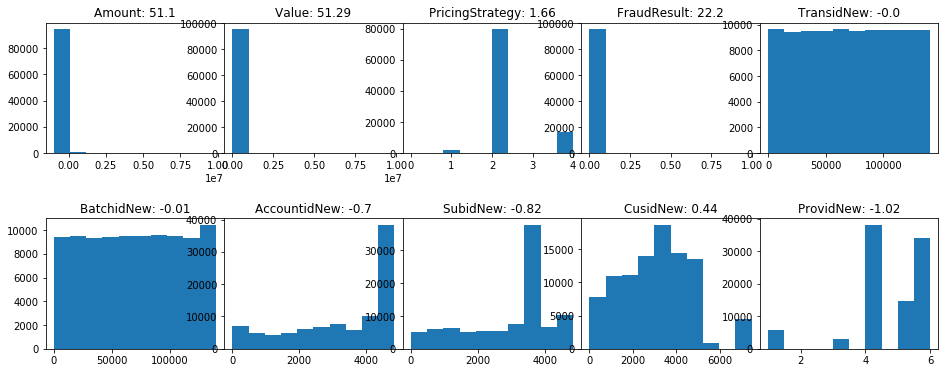

In [10]:
fig, axs = plt.subplots(2,5, figsize=(16, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()

for i,j in zip([i for i in numerical_features.columns.to_list()[1:] if len(i) >3],range(10)):
    axs[j].hist(numerical_features[i])
    axs[j].set_title(i+': '+str(np.round(numerical_features[i].skew(),2))) # '2' at d end of d line reps no. of decimal plcs

1. Amount: is moderately right skewed
2. Value is right skewed
3. Price strategy is moderately left skewed
4. Fraudresult is right skewed

In [11]:
# data is highly imbalance
numerical_features['FraudResult'].value_counts()     


0    95469
1      193
Name: FraudResult, dtype: int64

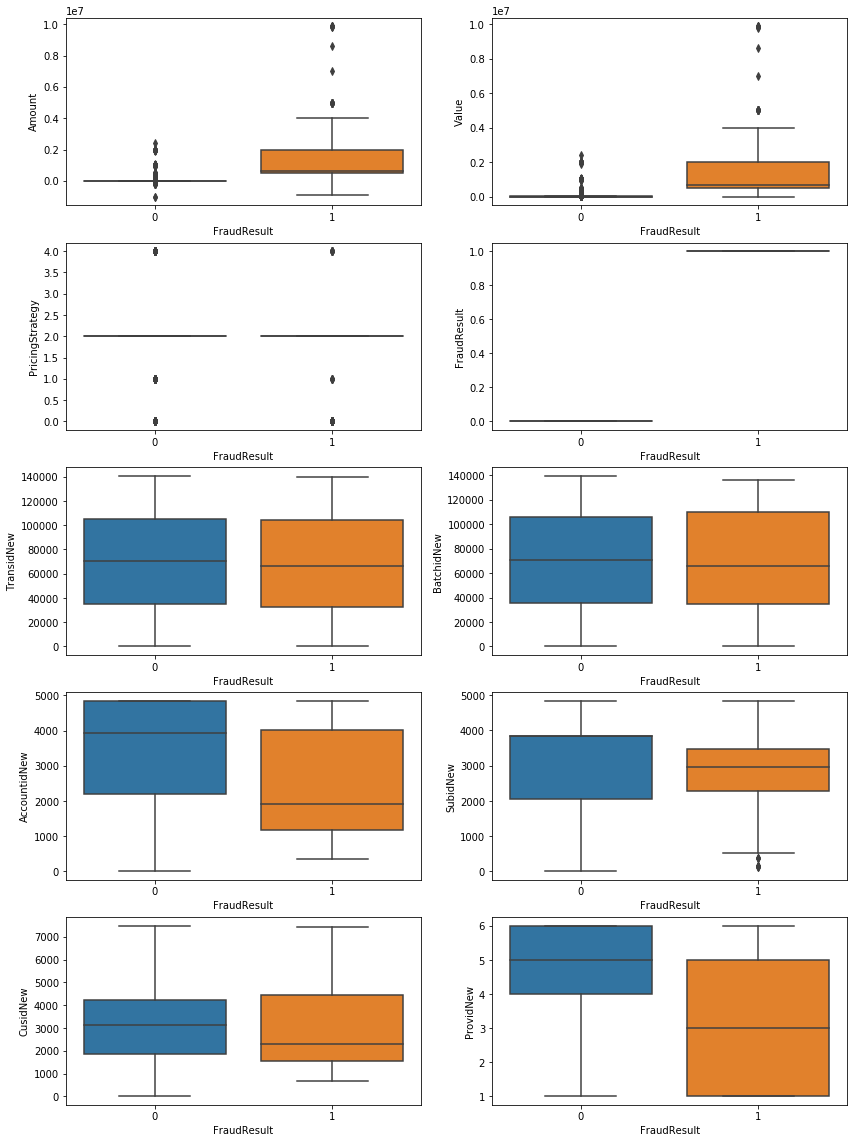

In [12]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9,ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(14,20))
AX = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

for i,j in zip([i for i in numerical_features.columns.to_list()[1:] if len(i) >3],AX):
    sns.boxplot(x = 'FraudResult', y = i, data =numerical_features,ax=j)

value & amount seems to be corelated to fraudresult

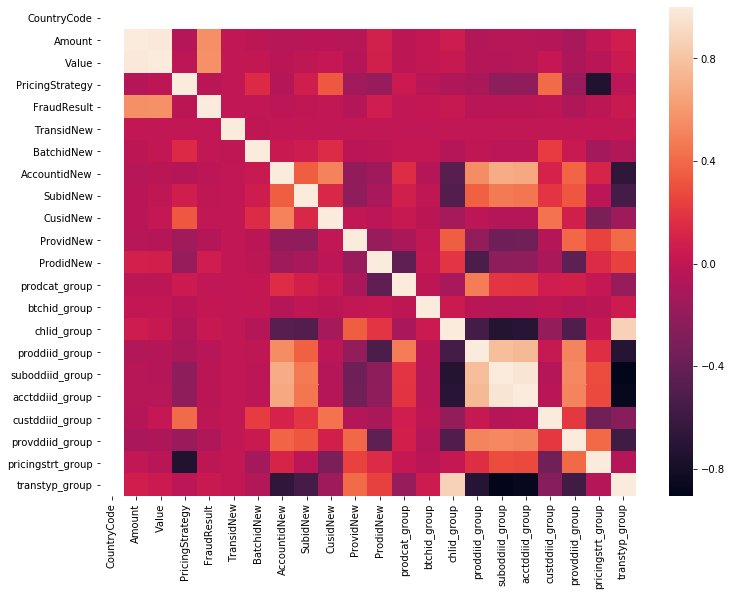

In [13]:
# Correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(numerical_features.corr())

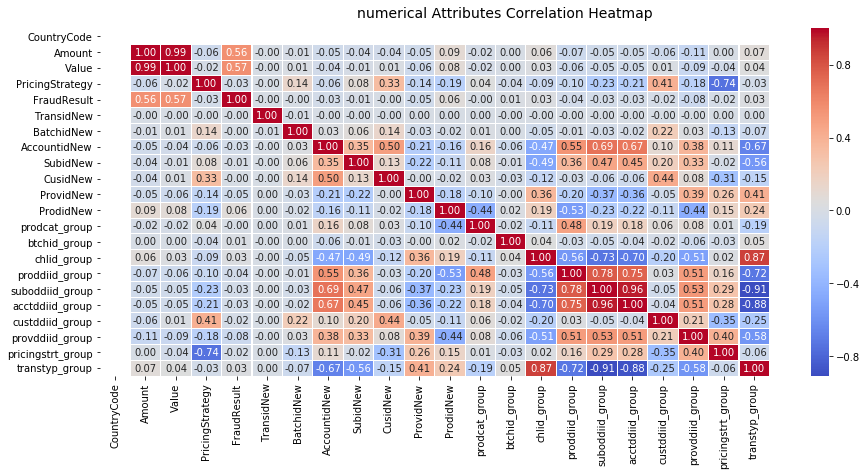

In [14]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 6))
corr = numerical_features.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('numerical Attributes Correlation Heatmap', fontsize=14)

In [15]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]
vif["features"] = numerical_features.columns
vif

,VIF Factor,features
0,1755.781944,CountryCode
1,74.688732,Amount
2,75.556453,Value
3,2.579467,PricingStrategy
4,1.483105,FraudResult
5,1.000161,TransidNew
6,1.065441,BatchidNew
7,6.045486,AccountidNew
8,1.483019,SubidNew
9,3.994785,CusidNew


collinearity between value and amount features...may drop one

#### 1.2) Relationship with Categorical Variables

In [16]:
categorical_features.shape, categorical_features.columns

((95662, 12),
 Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
        'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory',
        'ChannelId', 'TransactionStartTime', 'TransactionType'],
       dtype='object'))

In [17]:
for i in categorical_features.columns.to_list():
    print("Total unique values for",i,len(categorical_features[i].unique()))
    print("Value Counts for",i,'\n',categorical_features[i].value_counts(),'\n')

Total unique values for TransactionId 95662
Value Counts for TransactionId 
 TransactionId_108587    1
TransactionId_56454     1
TransactionId_93389     1
TransactionId_77843     1
TransactionId_39775     1
TransactionId_83296     1
TransactionId_139932    1
TransactionId_53567     1
TransactionId_137332    1
TransactionId_42235     1
TransactionId_34423     1
TransactionId_73980     1
TransactionId_7585      1
TransactionId_38777     1
TransactionId_35973     1
TransactionId_48614     1
TransactionId_71922     1
TransactionId_85854     1
TransactionId_50642     1
TransactionId_21887     1
TransactionId_29751     1
TransactionId_102082    1
TransactionId_5413      1
TransactionId_126911    1
TransactionId_40902     1
TransactionId_105979    1
TransactionId_100929    1
TransactionId_90492     1
TransactionId_29099     1
TransactionId_32042     1
                       ..
TransactionId_12715     1
TransactionId_34202     1
TransactionId_124454    1
TransactionId_115523    1
TransactionId

In [18]:
for i in categorical_features.columns.to_list():
    print(pd.crosstab(df[i],df['FraudResult']))

FraudResult           0  1
TransactionId             
TransactionId_1       1  0
TransactionId_100     1  0
TransactionId_1000    1  0
TransactionId_10000   1  0
TransactionId_100001  1  0
TransactionId_100002  1  0
TransactionId_100005  1  0
TransactionId_100006  1  0
TransactionId_100007  1  0
TransactionId_100009  1  0
TransactionId_10001   1  0
TransactionId_100010  1  0
TransactionId_100011  1  0
TransactionId_100013  1  0
TransactionId_100015  1  0
TransactionId_100017  1  0
TransactionId_100019  1  0
TransactionId_10002   1  0
TransactionId_100020  1  0
TransactionId_100021  1  0
TransactionId_100022  1  0
TransactionId_100023  1  0
TransactionId_100024  1  0
TransactionId_100026  1  0
TransactionId_100027  1  0
TransactionId_100029  0  1
TransactionId_10003   1  0
TransactionId_100031  1  0
TransactionId_100032  1  0
TransactionId_100033  1  0
...                  .. ..
TransactionId_99962   1  0
TransactionId_99964   1  0
TransactionId_99965   1  0
TransactionId_99966   1  0
T

FraudResult           0  1
TransactionStartTime      
2018-11-15T02:18:49Z  1  0
2018-11-15T02:19:08Z  1  0
2018-11-15T02:44:21Z  1  0
2018-11-15T03:32:55Z  1  0
2018-11-15T03:34:21Z  1  0
2018-11-15T03:35:10Z  1  0
2018-11-15T03:44:31Z  1  0
2018-11-15T03:45:13Z  1  0
2018-11-15T04:14:59Z  1  0
2018-11-15T04:31:48Z  1  0
2018-11-15T04:32:08Z  1  0
2018-11-15T04:32:42Z  1  0
2018-11-15T04:35:10Z  1  0
2018-11-15T04:47:31Z  1  0
2018-11-15T04:48:09Z  1  0
2018-11-15T04:51:20Z  1  0
2018-11-15T04:52:37Z  1  0
2018-11-15T04:54:00Z  1  0
2018-11-15T04:54:18Z  1  0
2018-11-15T04:56:25Z  1  0
2018-11-15T04:57:00Z  1  0
2018-11-15T04:59:02Z  1  0
2018-11-15T04:59:41Z  1  0
2018-11-15T04:59:51Z  1  0
2018-11-15T05:06:25Z  1  0
2018-11-15T05:06:39Z  1  0
2018-11-15T05:37:24Z  1  0
2018-11-15T05:38:25Z  1  0
2018-11-15T05:38:35Z  1  0
2018-11-15T05:38:37Z  1  0
...                  .. ..
2019-02-13T09:30:22Z  1  0
2019-02-13T09:30:56Z  1  0
2019-02-13T09:30:59Z  1  0
2019-02-13T09:33:17Z  1  0
2

1. fraud happens mostly in provider1,3 & 5
2. most frauds were perpetrated using productid_15 carry about 80%
3. The product category most frauds fell under was under financial_services
4. For chanelid, channelid_3 had up 184 fraud cases taking upto 90% of the total fraud cases
5. finally, most of the fraud cases were on debit transactions as it had about 95%

### 2.) Feature Engineering

#### 2.1) For Categorical Variables

In [19]:
# Loading raw_data again

df_train = pd.read_csv('training.csv')
df_test = pd.read_csv('test.csv')
df_sample_submission = pd.read_csv('sample_submission.csv')

df_train.shape, df_test.shape, df_sample_submission.shape

((95662, 16), (45019, 15), (45019, 2))

In [20]:
#shuffling dataframe rows 
df_train=df_train.sample(frac=1, random_state=0).reset_index(drop=True)

In [21]:
#merge test and train before engineering features
df_test['FraudResult'] = 'NA'
df = df_train.append(df_test, ignore_index=True)
print(df.shape)


(140681, 16)


In [22]:
#creating new columns #notice i used 30 in order to capture all other values towards the end of the strings
df['TransidNew']= df.TransactionId.str.slice(14,30).astype(int)
df['BatchidNew']= df.BatchId.str.slice(8,30).astype(int)
df['AccountidNew']= df.AccountId.str.slice(10,30).astype(int)
df['SubidNew']= df.SubscriptionId.str.slice(15,30).astype(int)
df['CusidNew']= df.CustomerId.str.slice(11,30).astype(int)
df['ProvidNew']= df.ProviderId.str.slice(-1).astype(int)
df['ProdidNew']= df.ProductId.str.slice(10,30).astype(int)

In [23]:
#CREATING A NEW FEATURE ON 
df["TransactionType"]=df["Amount"]

#CONVERTS NEGATIVE NUMBERS TO STRINGS FOR CATEGORICAL USES:
df["TransactionType"].loc[df["TransactionType"]<0]="credit"

#CONVERTS NEGATIVE NUMBERS TO STRINGS FOR CATEGORICAL USES:
#xente_train["TransactionType"].loc[xente_train["TransactionType"]>0]="credit"
#couldnt apply same code used for -ve values on the +ve values cos: "TypeError: '>' not supported between instances of 'str' and 'int'"
ttyy=DataFrame(df["TransactionType"])
credit="credit"
def loc():
    ttyy.loc[ttyy["TransactionType"] !=credit ] = "debit"
loc()   #BOOOM!!!! WOOOOWW!! THIS WORKED!!!

#NOW WE WOULD GO AHEAD TO UPDATE THE COLUMN :"TransactionType" IN OUR MAIN TABLE/DATASET
df["TransactionType"]=ttyy["TransactionType"]


In [24]:
#creating a new feature by doing a frequency encoding of categorical features
prdc = df.groupby('ProductCategory').size()
df['prodcat_group']=df['ProductCategory'].map(prdc)

btch = df.groupby('BatchId').size()
df['btchid_group']=df['BatchId'].map(btch)

chnlid = df.groupby('ChannelId').size()
df['chlid_group']=df['ChannelId'].map(chnlid)

proddid = df.groupby('ProductId').size()
df['proddiid_group']=df['ProductId'].map(proddid)

subddid = df.groupby('SubscriptionId').size()
df['suboddiid_group']=df['SubscriptionId'].map(subddid)

actddid = df.groupby('AccountId').size()
df['acctddiid_group']=df['AccountId'].map(actddid)

custddid = df.groupby('CustomerId').size()
df['custddiid_group']=df['CustomerId'].map(custddid)

provddid = df.groupby('ProviderId').size()
df['provddiid_group']=df['ProviderId'].map(provddid)

pricestrt = df.groupby('PricingStrategy').size()
df['pricingstrt_group']=df['PricingStrategy'].map(pricestrt)

transtyp = df.groupby('TransactionType').size()
df['transtyp_group']=df['TransactionType'].map(transtyp)


In [25]:
#Here we format the time/date column to a pandas datetime format where we can extract other useable features
df['TransactionStartTime']=pd.to_datetime(df.TransactionStartTime)

df['DayOfWeek']=df.TransactionStartTime.dt.weekday_name

#indicating the day of the year in numbers....non categorical
df['DayOfYear']=df.TransactionStartTime.dt.dayofyear

#this is indicating the day of the month in numbers...this wont be treated as a categorical var
df['DayOfmonth']=df.TransactionStartTime.dt.day

#this is indicating the number of days in the month of that transaction...this wont be treated as a categorical var
df['DaysInMonth']=df.TransactionStartTime.dt.daysinmonth

#this is indicating the hour of the daythe transaction happend...this wont be treated as a categorical var
df['hour']=df.TransactionStartTime.dt.hour

#this is indicating if its end of month or not in boolean...this would be treated as a categorical var
df['MonthEndOrNot']=df.TransactionStartTime.dt.is_month_end

#this is indicating if its end of month or not in boolean...this would be treated as a categorical var
df['MonthStartOrNot']=df.TransactionStartTime.dt.is_month_start

#this is indicating if its beginning of quarter or not in boolean...this wont be treated as a categorical var
df['IsQuarterStart']=df.TransactionStartTime.dt.is_quarter_start

#this is indicating if its end of month or not in boolean...this wont be treated as a categorical var
df['IsQuarterEnd']=df.TransactionStartTime.dt.is_quarter_end

#this is indicating number of minutes...this wont be treated as a categorical var
df['Minute']=df.TransactionStartTime.dt.minute

#this is indicating number of seconds from the last minute...this wont be treated as a categorical var
df['seconds']=df.TransactionStartTime.dt.second


In [26]:
df.shape

(140681, 45)

In [27]:
df.isnull().sum().sum()

0

In [28]:
#we no longer need it as it has been spilled into other subsets
df=df.drop([ 'TransactionStartTime'], axis=1)

In [29]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,DayOfYear,DayOfmonth,DaysInMonth,hour,MonthEndOrNot,MonthStartOrNot,IsQuarterStart,IsQuarterEnd,Minute,seconds
0,TransactionId_91392,BatchId_117569,AccountId_834,SubscriptionId_3759,CustomerId_1179,UGX,256,ProviderId_1,ProductId_3,airtime,...,23,23,31,11,False,False,False,False,50,31
1,TransactionId_119416,BatchId_24161,AccountId_4127,SubscriptionId_4240,CustomerId_4579,UGX,256,ProviderId_6,ProductId_10,airtime,...,19,19,31,17,False,False,False,False,11,53
2,TransactionId_124012,BatchId_51521,AccountId_190,SubscriptionId_1897,CustomerId_513,UGX,256,ProviderId_6,ProductId_10,airtime,...,326,22,30,6,False,False,False,False,34,7
3,TransactionId_12251,BatchId_126898,AccountId_4840,SubscriptionId_3829,CustomerId_3212,UGX,256,ProviderId_4,ProductId_6,financial_services,...,32,1,28,17,False,True,False,False,45,7
4,TransactionId_27059,BatchId_17843,AccountId_1579,SubscriptionId_821,CustomerId_1956,UGX,256,ProviderId_6,ProductId_3,airtime,...,15,15,31,12,False,False,False,False,21,53


In [30]:
for i in df.columns.to_list():
    print(pd.crosstab(df[i],df['FraudResult']))

FraudResult           0  1  NA
TransactionId                 
TransactionId_1       1  0   0
TransactionId_10      0  0   1
TransactionId_100     1  0   0
TransactionId_1000    1  0   0
TransactionId_10000   1  0   0
TransactionId_100000  0  0   1
TransactionId_100001  1  0   0
TransactionId_100002  1  0   0
TransactionId_100003  0  0   1
TransactionId_100004  0  0   1
TransactionId_100005  1  0   0
TransactionId_100006  1  0   0
TransactionId_100007  1  0   0
TransactionId_100008  0  0   1
TransactionId_100009  1  0   0
TransactionId_10001   1  0   0
TransactionId_100010  1  0   0
TransactionId_100011  1  0   0
TransactionId_100012  0  0   1
TransactionId_100013  1  0   0
TransactionId_100014  0  0   1
TransactionId_100015  1  0   0
TransactionId_100016  0  0   1
TransactionId_100017  1  0   0
TransactionId_100018  0  0   1
TransactionId_100019  1  0   0
TransactionId_10002   1  0   0
TransactionId_100020  1  0   0
TransactionId_100021  1  0   0
TransactionId_100022  1  0   0
...     

FraudResult             0    1     NA
ProductCategory                      
airtime             45009   18  20923
data_bundles         1613    0    914
financial_services  45244  161  21700
movies                175    0     78
other                   2    0      0
retail                  0    0    184
ticket                216    0     16
transport              23    2      5
tv                   1279    0    459
utility_bill         1908   12    740
FraudResult      0    1     NA
ChannelId                     
ChannelId_1    534    4    102
ChannelId_2  37136    5   6198
ChannelId_3  56751  184  38090
ChannelId_4      0    0     27
ChannelId_5   1048    0    602
FraudResult    0   1   NA
Amount                   
-2500000.0     0   0    1
-1200000.0     0   0    1
-1000000.0     2   0    0
-900000.0      0   1    0
-500000.0      0   3    0
-400000.0      0   0    1
-342000.0      0   0   72
-200000.0      8   0   12
-192000.0      0   0  104
-160000.0      2   0    2
-150000.0      

FraudResult   0  1  NA
CusidNew              
1             1  0   0
2             1  0   0
3             1  0   0
4             1  0   0
5             1  0   0
6             1  0   0
7             1  0   0
8             1  0   0
9             1  0   0
10            1  0   0
11            1  0   0
12            1  0   0
13            1  0   0
14            1  0   0
15            1  0   0
16            0  0   1
17            0  0   1
18            0  0   1
19            0  0   1
20            0  0   1
21            0  0   1
22            0  0   1
23            0  0   1
24            0  0   1
25            0  0   1
26            0  0   1
27            0  0   1
28            0  0   1
29            0  0   1
30            0  0   1
...          .. ..  ..
7450         13  0   0
7451          7  0   0
7452          9  0   0
7453          6  0   0
7454          2  0   0
7455          2  0   0
7456          2  0   0
7457          2  0   0
7458          3  0   0
7459          3  0   0
7460       

FraudResult          0   1     NA
provddiid_group                  
24                  18   0      6
4652              3020  64   1568
8034              5586  57   2391
21519            14478  64   6977
50007            34183   3  15821
56445            38184   5  18256
FraudResult            0    1     NA
pricingstrt_group                   
653                  349   36    268
2559                1860    7    692
20043              13551   11   6481
117426             79709  139  37578
FraudResult         0    1     NA
transtyp_group                   
56443           38184    5  18254
84238           57285  188  26765
FraudResult      0   1     NA
DayOfWeek                    
Friday       27686  30  13474
Monday       11808  29   4137
Saturday     10078  25   4074
Sunday        9671  15   3855
Thursday     11005  34   8545
Tuesday      15018  31   4310
Wednesday    10203  29   6624
FraudResult     0   1  NA
DayOfYear                
1             775   2   0
2             551   1 

1. Most of the frauds happened mostly at the end of the month logically, they targeted when many must have recieved
   salaries
2. Also the beggining of the month was a target as well

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140681 entries, 0 to 140680
Data columns (total 44 columns):
TransactionId        140681 non-null object
BatchId              140681 non-null object
AccountId            140681 non-null object
SubscriptionId       140681 non-null object
CustomerId           140681 non-null object
CurrencyCode         140681 non-null object
CountryCode          140681 non-null int64
ProviderId           140681 non-null object
ProductId            140681 non-null object
ProductCategory      140681 non-null object
ChannelId            140681 non-null object
Amount               140681 non-null float64
Value                140681 non-null int64
PricingStrategy      140681 non-null int64
FraudResult          140681 non-null object
TransidNew           140681 non-null int64
BatchidNew           140681 non-null int64
AccountidNew         140681 non-null int64
SubidNew             140681 non-null int64
CusidNew             140681 non-null int64
ProvidNew       

In [32]:
#now we encode
combined1=pd.get_dummies(df['CurrencyCode'])
#now we encode
combined2=pd.get_dummies(df['ProviderId'])
#now we encode
combined3=pd.get_dummies(df['ProductId'])
#now we encode
combined4=pd.get_dummies(df['ProductCategory'])
#now we encode
combined5=pd.get_dummies(df['ChannelId'])
#now we encode
combined6=pd.get_dummies(df['TransactionType'])
#now we encode
combined7=pd.get_dummies(df['DayOfWeek'])
#now we encode
combined8=pd.get_dummies(df['MonthEndOrNot'])
#now we encode
combined9=pd.get_dummies(df['MonthStartOrNot'])
#now we encode
combined10=pd.get_dummies(df['IsQuarterStart'])
#now we encode
combined11=pd.get_dummies(df['IsQuarterEnd'])

In [33]:
#now we combine all datasets together
df1=pd.concat([df,combined1,combined2,combined3,combined4,combined5,combined6,combined7,combined8,combined9,combined10,combined11], axis=1)

In [34]:
#i am now dropping the string/object/boolean categorical features cos they have been converted to dummies
df1=df1.drop(['TransactionId','SubscriptionId','BatchId','AccountId','CustomerId', 'CurrencyCode','CountryCode','ProviderId', 'ProductCategory', 'ChannelId','ProductId', 'TransactionType', 'DayOfWeek', 'MonthEndOrNot','MonthStartOrNot', 'IsQuarterStart', 'IsQuarterEnd'], axis=1)

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140681 entries, 0 to 140680
Data columns (total 93 columns):
Amount                140681 non-null float64
Value                 140681 non-null int64
PricingStrategy       140681 non-null int64
FraudResult           140681 non-null object
TransidNew            140681 non-null int64
BatchidNew            140681 non-null int64
AccountidNew          140681 non-null int64
SubidNew              140681 non-null int64
CusidNew              140681 non-null int64
ProvidNew             140681 non-null int64
ProdidNew             140681 non-null int64
prodcat_group         140681 non-null int64
btchid_group          140681 non-null int64
chlid_group           140681 non-null int64
proddiid_group        140681 non-null int64
suboddiid_group       140681 non-null int64
acctddiid_group       140681 non-null int64
custddiid_group       140681 non-null int64
provddiid_group       140681 non-null int64
pricingstrt_group     140681 non-null int64
transt

In [36]:
df1.columns

Index([            'Amount',              'Value',    'PricingStrategy',
              'FraudResult',         'TransidNew',         'BatchidNew',
             'AccountidNew',           'SubidNew',           'CusidNew',
                'ProvidNew',          'ProdidNew',      'prodcat_group',
             'btchid_group',        'chlid_group',     'proddiid_group',
          'suboddiid_group',    'acctddiid_group',    'custddiid_group',
          'provddiid_group',  'pricingstrt_group',     'transtyp_group',
                'DayOfYear',         'DayOfmonth',        'DaysInMonth',
                     'hour',             'Minute',            'seconds',
                      'UGX',       'ProviderId_1',       'ProviderId_2',
             'ProviderId_3',       'ProviderId_4',       'ProviderId_5',
             'ProviderId_6',        'ProductId_1',       'ProductId_10',
             'ProductId_11',       'ProductId_12',       'ProductId_13',
             'ProductId_14',       'ProductId_15', 

In [37]:
df1.shape

(140681, 93)

## 3) Recursive Feature Engineering (Dimensionality Reduction)

In [258]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import StratifiedShuffleSplit

In [259]:
train = df1.iloc[:95662,:]
#xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['FraudResult'].values.ravel(), random_state=42, test_size=0.1)
#X = xtrain
#y = ytrain
X= train
y= df_train['FraudResult']
#instantiating the class and splitting 
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
sss.get_n_splits(X, y)
     
StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.25)
for train_index, test_index in sss.split(train, df_train['FraudResult']):
    print("TRAIN:", train_index, "TEST:", test_index)
    xtrain, xtest = X.loc[train_index], X.loc[test_index]
    ytrain, ytest = y.loc[train_index], y.loc[test_index]

TRAIN: [88826  2425 91697 ... 24551 36746 60855] TEST: [16930 43918 13148 ...  9784 68470 76260]
TRAIN: [ 4471 21955 77277 ... 88407 38167 15645] TEST: [48406 33318 31542 ... 71087 12669 79137]
TRAIN: [77193 31185 30584 ... 77251  5052 48174] TEST: [36003 46751 18542 ... 79799 77342  9121]
TRAIN: [74293 29479 19087 ... 13784 20995 72725] TEST: [46191 53751 17475 ... 79011 84536  7505]
TRAIN: [77808 40381 64982 ... 68724 86339 66867] TEST: [76172 71021  2741 ... 57774 85298 66607]


In [260]:
#Dropping fraudresult from trainset and xtest
X=X.drop(['FraudResult'], axis=1)
xtest=xtest.drop(['FraudResult'], axis=1)

#### 3.1) RFE (LogisticRegression)

In [45]:
n_feat = [8,10,12,15,20,25,30]
for n in n_feat:
    model = LogisticRegression(solver='warn')
    rfe = RFE(model, n_features_to_select = n)
    rfe = rfe.fit(X, y)
    cols = X.columns.tolist()
    sel_feat = pd.DataFrame({"cols": cols, "support": rfe.support_, "rank": rfe.ranking_})
    print("Top features: ", n)
    print(rfe.score(X, y))
    print(f1_score(ytest, rfe.predict(xtest)))
    print(sel_feat[sel_feat['rank'] == 1]['cols'].unique(), '\n')


Top features:  8
0.9980022068645101
0.0
['PricingStrategy' 'ProviderId_3' 'ProductId_13' 'ProductId_15'
 'ProductId_5' 'ProductId_9' 'transport' 'utility_bill'] 

Top features:  10
0.9980486671699866
0.0
['PricingStrategy' 'ProviderId_3' 'ProductId_13' 'ProductId_15'
 'ProductId_22' 'ProductId_5' 'ProductId_9' 'transport' 'utility_bill'
 False] 

Top features:  12
0.9980486671699866
0.0
['PricingStrategy' 'ProviderId_3' 'ProductId_13' 'ProductId_15'
 'ProductId_22' 'ProductId_5' 'ProductId_9' 'transport' 'utility_bill'
 'Friday' True False] 

Top features:  15
0.9980486671699866
0.0
['PricingStrategy' 'ProviderId_1' 'ProviderId_3' 'ProviderId_5'
 'ProductId_13' 'ProductId_15' 'ProductId_22' 'ProductId_5' 'ProductId_9'
 'transport' 'utility_bill' 'Friday' True False] 

Top features:  20
0.9980486671699866
0.0
['PricingStrategy' 'ProvidNew' 'ProviderId_1' 'ProviderId_3'
 'ProviderId_5' 'ProductId_1' 'ProductId_13' 'ProductId_15' 'ProductId_22'
 'ProductId_4' 'ProductId_5' 'ProductId_9' '

### 3.2) RFE (RandomForestClassifier)

In [46]:
n_feat = [8,10,12,15,20,25,30]
for n in n_feat:
    model = RandomForestClassifier()
    rfe = RFE(model, n_features_to_select = n)
    rfe = rfe.fit(X, y)
    cols = X.columns.tolist()
    sel_feat = pd.DataFrame({"cols": cols, "support": rfe.support_, "rank": rfe.ranking_})
    print("Top features: ", n)
    print(rfe.score(X, y))
    print(f1_score(ytest, rfe.predict(xtest)))
    print(sel_feat[sel_feat['rank'] == 1]['cols'].unique(), '\n')

Top features:  8
0.9999535396945235
0.9523809523809523
['Amount' 'Value' 'TransidNew' 'SubidNew' 'acctddiid_group' 'DayOfYear'
 'DayOfmonth' 'Minute'] 

Top features:  10
0.9999303095417852
0.9500000000000001
['Amount' 'Value' 'TransidNew' 'AccountidNew' 'CusidNew' 'DayOfYear'
 'DayOfmonth' 'hour' 'Minute' 'seconds'] 

Top features:  12
0.9999883849236308
0.9500000000000001
['Amount' 'Value' 'TransidNew' 'BatchidNew' 'AccountidNew' 'SubidNew'
 'CusidNew' 'suboddiid_group' 'DayOfYear' 'DayOfmonth' 'Minute' 'seconds'] 

Top features:  15
0.9999883849236308
0.9767441860465117
['Amount' 'Value' 'PricingStrategy' 'TransidNew' 'BatchidNew'
 'AccountidNew' 'SubidNew' 'CusidNew' 'suboddiid_group' 'acctddiid_group'
 'DayOfYear' 'DayOfmonth' 'hour' 'Minute' 'seconds'] 

Top features:  20
0.9999651547708927
0.975609756097561
['Amount' 'Value' 'TransidNew' 'BatchidNew' 'AccountidNew' 'SubidNew'
 'CusidNew' 'ProdidNew' 'suboddiid_group' 'acctddiid_group'
 'custddiid_group' 'provddiid_group' 'pricin

### 3.3) RFE (DecisionTreeClassifier)

In [47]:
n_feat = [6,7,8,10,12,15,20,25]
for n in n_feat:
    model = DecisionTreeClassifier()
    rfe = RFE(model, n_features_to_select = n)
    rfe = rfe.fit(X, y)
    cols = X.columns.tolist()
    sel_feat = pd.DataFrame({"cols": cols, "support": rfe.support_, "rank": rfe.ranking_})
    print("Top features: ", n)
    print(rfe.score(X, y))
    print(f1_score(ytest, rfe.predict(xtest)))
    print(sel_feat[sel_feat['rank'] == 1]['cols'].unique(), '\n')

Top features:  6
1.0
0.9523809523809523
['Value' 'BatchidNew' 'SubidNew' 'DayOfYear' 'DayOfmonth' 'Minute'] 

Top features:  7
1.0
0.9302325581395349
['Value' 'SubidNew' 'DayOfYear' 'DayOfmonth' 'hour' 'Minute'
 'ProviderId_3'] 

Top features:  8
1.0
0.9268292682926829
['Value' 'TransidNew' 'SubidNew' 'prodcat_group' 'DayOfYear' 'DayOfmonth'
 'hour' 'Minute'] 

Top features:  10
1.0
0.9523809523809523
['Value' 'TransidNew' 'BatchidNew' 'SubidNew' 'CusidNew' 'provddiid_group'
 'DayOfYear' 'DayOfmonth' 'hour' 'Minute'] 

Top features:  12
1.0
0.8837209302325582
['Amount' 'Value' 'TransidNew' 'BatchidNew' 'SubidNew' 'custddiid_group'
 'provddiid_group' 'DayOfYear' 'DayOfmonth' 'hour' 'Minute' 'Thursday'] 

Top features:  15
1.0
0.9268292682926829
['Amount' 'Value' 'TransidNew' 'BatchidNew' 'AccountidNew' 'SubidNew'
 'CusidNew' 'custddiid_group' 'DayOfYear' 'DayOfmonth' 'Minute' 'seconds'
 'ProviderId_3' 'financial_services' 'Thursday'] 

Top features:  20
1.0
0.9047619047619048
['Amount' 

### 3.4) RFE (AdaBoostClassifier)

In [48]:
n_feat = [8,10,12,15,20,25,30]
for n in n_feat:
    model = AdaBoostClassifier()
    rfe = RFE(model, n_features_to_select = n)
    rfe = rfe.fit(X, y)
    cols = X.columns.tolist()
    sel_feat = pd.DataFrame({"cols": cols, "support": rfe.support_, "rank": rfe.ranking_})
    print("Top features: ", n)
    print(rfe.score(X, y))
    print(f1_score(ytest, rfe.predict(xtest)))
    print(sel_feat[sel_feat['rank'] == 1]['cols'].unique(), '\n')

Top features:  8
0.999628317556188
0.923076923076923
['Amount' 'Value' 'TransidNew' 'BatchidNew' 'SubidNew' 'CusidNew'
 'custddiid_group' 'DayOfYear'] 

Top features:  10
0.9997096230907718
0.923076923076923
['Amount' 'Value' 'TransidNew' 'BatchidNew' 'SubidNew' 'CusidNew'
 'custddiid_group' 'DayOfYear' 'DayOfmonth' 'Monday'] 

Top features:  12
0.9996980080144027
0.9500000000000001
['Amount' 'Value' 'TransidNew' 'BatchidNew' 'SubidNew' 'CusidNew'
 'custddiid_group' 'DayOfYear' 'DayOfmonth' 'ProviderId_3' 'Monday'
 'Thursday'] 

Top features:  15
0.999639932632557
0.9500000000000001
['Amount' 'Value' 'TransidNew' 'BatchidNew' 'AccountidNew' 'SubidNew'
 'CusidNew' 'acctddiid_group' 'custddiid_group' 'DayOfYear' 'DayOfmonth'
 'hour' 'ProviderId_3' 'Monday' 'Thursday'] 

Top features:  20
0.999639932632557
0.9500000000000001
['Amount' 'Value' 'TransidNew' 'BatchidNew' 'AccountidNew' 'SubidNew'
 'CusidNew' 'acctddiid_group' 'custddiid_group' 'transtyp_group'
 'DayOfYear' 'DayOfmonth' 'hour

# 4.) Simple Model

Try different models followed by confusion matrix, ROC curve and other accuracy measures on best model

In [69]:
#Top 10 features for random forest classifier
"""Top features:  10
0.9999535396945235
0.975609756097561
['Amount' 'Value' 'TransidNew' 'BatchidNew' 'AccountidNew' 'SubidNew'
 'CusidNew' 'DayOfYear' 'DayOfmonth' 'Minute'] """

#Top 10 for Descision Tree classifier
"""Top features:  10
1.0
0.9523809523809523
['Amount' 'Value' 'TransidNew' 'BatchidNew' 'AccountidNew' 'SubidNew'
 'ProdidNew' 'DayOfYear' 'DayOfmonth' 'Minute'] """

#Top 20 for Adaboost classifier
"""Top features:  20
0.99973285324351
0.9500000000000001
['Amount' 'Value' 'PricingStrategy' 'TransidNew' 'BatchidNew'
 'AccountidNew' 'SubidNew' 'CusidNew' 'ProvidNew' 'ProdidNew' 'DayOfYear'
 'DayOfmonth' 'Minute' 'seconds' 'ProviderId_3' 'ChannelId_3'
 'ChannelId_4' 'ChannelId_5' 'Saturday' 'Sunday'] """

#Final 24 features choosen
cols=['Amount', 'Value', 'PricingStrategy', 'TransidNew', 'BatchidNew','ProviderId_3',
 'AccountidNew', 'SubidNew', 'CusidNew', 'suboddiid_group', 'acctddiid_group','financial_services',
 'DayOfYear', 'DayOfmonth', 'hour', 'Minute', 'seconds','ProvidNew','prodcat_group',
      'Thursday','provddiid_group','ChannelId_1', 'ChannelId_4', 'transtyp_group']


In [253]:
#SELECTING OUR COLUMNS FOR TRAINING AND TESTING : WE WOULD ADD TARGET COLUMN TO TRAIN LATER BELOW
# train = df1.iloc[:116058,:]
# test = df1.iloc[116058:,:]
train = df1.iloc[:95662,:][cols]
test = df1.iloc[95662:,:][cols]

In [261]:
#Creating our simple model
def simple_model(alg):

    # splitting data into training and validation set
    #xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['FraudResult'].values.ravel(), random_state=12, test_size=25)
    X= train
    y= df_train['FraudResult']
    #instantiating the class and splitting 
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
    sss.get_n_splits(X, y)
     
    StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.25)
    for train_index, test_index in sss.split(train, df_train['FraudResult']):
        print("TRAIN:", train_index, "TEST:", test_index)
        xtrain, xtest = X.loc[train_index], X.loc[test_index]
        ytrain, ytest = y.loc[train_index], y.loc[test_index]
    model = alg
    model.fit(xtrain, ytrain) # training the model
#     prediction = model.predict_proba(xtest) # predicting on the validation set
#     prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
#     prediction_int = prediction_int.astype(np.int)

    print("f1_score:",f1_score(ytest, model.predict(xtest))) # calculating f1 score
    print("Accuracy on train data:",model.score(xtrain,ytrain))
    print("Accuracy on test data:",model.score(xtest,ytest))

In [262]:
algs = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),ExtraTreesClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]
algs_lst = ['LR','DTC','RFC','ETC','ABC','GBC']
for alg,l in zip(algs,algs_lst):
    print(l)
    simple_model(alg=alg)


LR
TRAIN: [88826  2425 91697 ... 24551 36746 60855] TEST: [16930 43918 13148 ...  9784 68470 76260]
TRAIN: [ 4471 21955 77277 ... 88407 38167 15645] TEST: [48406 33318 31542 ... 71087 12669 79137]
TRAIN: [77193 31185 30584 ... 77251  5052 48174] TEST: [36003 46751 18542 ... 79799 77342  9121]
TRAIN: [74293 29479 19087 ... 13784 20995 72725] TEST: [46191 53751 17475 ... 79011 84536  7505]
TRAIN: [77808 40381 64982 ... 68724 86339 66867] TEST: [76172 71021  2741 ... 57774 85298 66607]
f1_score: 0.39436619718309857
Accuracy on train data: 0.998201990354863
Accuracy on test data: 0.9982020404749958
DTC
TRAIN: [88826  2425 91697 ... 24551 36746 60855] TEST: [16930 43918 13148 ...  9784 68470 76260]
TRAIN: [ 4471 21955 77277 ... 88407 38167 15645] TEST: [48406 33318 31542 ... 71087 12669 79137]
TRAIN: [77193 31185 30584 ... 77251  5052 48174] TEST: [36003 46751 18542 ... 79799 77342  9121]
TRAIN: [74293 29479 19087 ... 13784 20995 72725] TEST: [46191 53751 17475 ... 79011 84536  7505]
TRAIN:



    1. RandomForestClassifier is giving highest f1 score (0.94): Need to fine tune it's parameters in order to get   better results
    2. All model are giving 100% accuracy on both train & test data; need to look at ROC curve & decide threshold value



In [169]:
# Confusion Matrix (on AdaBoostClassifier)
from sklearn.metrics import confusion_matrix
X= train
y= df_train['FraudResult']
#instantiating the class and splitting 
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
sss.get_n_splits(X, y)
     
StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.20)
for train_index, test_index in sss.split(train, df_train['FraudResult']):
    print("TRAIN:", train_index, "TEST:", test_index)
    xtrain, xtest = X.loc[train_index], X.loc[test_index]
    ytrain, ytest = y.loc[train_index], y.loc[test_index]

model = AdaBoostClassifier()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
confusion_matrix = confusion_matrix(ytest,ypred)
print(confusion_matrix)

ValueError: Found input variables with inconsistent numbers of samples: [28833, 95662]

In [166]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19094
           1       1.00      1.00      1.00        39

    accuracy                           1.00     19133
   macro avg       1.00      1.00      1.00     19133
weighted avg       1.00      1.00      1.00     19133



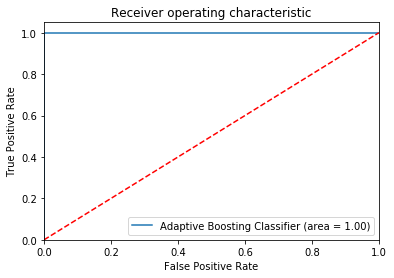

In [167]:
from sklearn.metrics import roc_auc_score, roc_curve

auc = roc_auc_score(ytest, ypred)
fpr, tpr, thresholds = roc_curve(ytest, ypred)
plt.figure()
plt.plot(fpr, tpr, label='Adaptive Boosting Classifier (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate'), plt.ylabel('True Positive Rate'), plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

AUC is 95%, but ROC curve is straight line, so it's difficult to choose threshold value from roc_curve
Also, I noticed that the AUC and ROC increased from 92 to 95 after using stratified shuffle split method

In [102]:
# Cross Validation
from sklearn.model_selection import cross_val_score, KFold

#xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['FraudResult'].values.ravel(), random_state=42, test_size=0.25)
kfold = KFold(n_splits = 10, random_state = 42)
modelCV = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 0)
y_pred=modelCV.fit(xtest,ytest)
scoring = 'f1_macro'
results_train = cross_val_score(modelCV, xtrain, ytrain, scoring = scoring, cv = kfold)
results_test = cross_val_score(modelCV, xtest, ytest, scoring = scoring, cv = kfold)
print("10-fold cross validation average accuracy on train data: %.3f" % (results_train.mean()))
print("10-fold cross validation average accuracy on test data: %.3f" % (results_test.mean()))
print("results_train:",results_train)
print("results_test:",results_test)

10-fold cross validation average accuracy on train data: 0.924
10-fold cross validation average accuracy on test data: 0.916
results_train: [0.92843178 0.89112985 0.91652706 0.91438955 0.90895132 0.87906595
 0.91645705 0.96421588 0.9827237  0.93989527]
results_test: [0.96143366 0.83322875 0.96656182 0.85241674 1.         0.91645711
 0.83312395 0.92846672 0.94433969 0.92846672]




    1. Based on 10-fold cross validation with AdaBoostClassifer; the average accuracy remains very close to the simple AdaBoostClassifer model accuracy; hence we can conclude that our model generalizes well. It is not overfitting our train data, so will perform very well on unseen data
   2.  But however, Let's see how it will perform after resampling this imbalance data



## 5.) Solving data imbalanced problem


    We are interested in predicting deliquent cases (generally low number of records in imbalanced data)
    Our objective: High recall on 1 & High precision on L
    3 ways solve it;
        Modify Loss function
        Modify the dataset (resampling)
        Ensemble methods


In [222]:
# Randomly selecting 30% of non-deliquency data
from sklearn.utils import resample

#Final 24 features choosen
cols=['Amount', 'Value', 'PricingStrategy', 'TransidNew', 'BatchidNew','ProviderId_3',
 'AccountidNew', 'SubidNew', 'CusidNew', 'suboddiid_group', 'acctddiid_group','financial_services',
 'DayOfYear', 'DayOfmonth', 'hour', 'Minute', 'seconds','ProvidNew','prodcat_group',
      'Thursday','provddiid_group','ChannelId_1', 'ChannelId_4', 'transtyp_group','FraudResult']

train = df1.iloc[:95662,:][cols]
not_deliq = train[train['FraudResult']==0]
deliq = train[train['FraudResult']==1]

not_deliq_downsampled = resample(not_deliq, replace = False, n_samples = int(not_deliq.shape[0]*0.1), random_state = 27)
deliq['FraudResult'].value_counts(), not_deliq['FraudResult'].value_counts(), not_deliq_downsampled['FraudResult'].value_counts()

(1    193
 Name: FraudResult, dtype: int64, 0    95469
 Name: FraudResult, dtype: int64, 0    9546
 Name: FraudResult, dtype: int64)

In [223]:
df2 = deliq.append(not_deliq_downsampled, ignore_index=True)
df2['FraudResult'] = df2['FraudResult'].astype(int)
print(df2.shape, df2.columns)
df2['FraudResult'].value_counts()


(9739, 25) Index(['Amount', 'Value', 'PricingStrategy', 'TransidNew', 'BatchidNew',
       'ProviderId_3', 'AccountidNew', 'SubidNew', 'CusidNew',
       'suboddiid_group', 'acctddiid_group', 'financial_services', 'DayOfYear',
       'DayOfmonth', 'hour', 'Minute', 'seconds', 'ProvidNew', 'prodcat_group',
       'Thursday', 'provddiid_group', 'ChannelId_1', 'ChannelId_4',
       'transtyp_group', 'FraudResult'],
      dtype='object')


0    9546
1     193
Name: FraudResult, dtype: int64

In [248]:
train = df2.drop('FraudResult',axis=1)
train = X
df2['FraudResult']=y
#instantiating the class and splitting 
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
sss.get_n_splits(X, y)
     
StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.25)
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    xtrain, xtest = X.loc[train_index], X.loc[test_index]
    ytrain, ytest = y.loc[train_index], y.loc[test_index]

#xtrain, xtest, ytrain, ytest = train_test_split(train, df2['FraudResult'].values.ravel(), random_state=42, test_size=0.50)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

model = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 0)
model.fit(xtrain, ytrain)
# ypred = model.predict(xtest)
prediction = model.predict_proba(xtest) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.41 # if prediction is greater than or equal to 0.3 than 1 else 0
ypred = prediction_int.astype(np.int)

print("f1_score:",f1_score(ytest, model.predict(xtest))) # calculating f1 score
print("Accuracy on train data:",model.score(xtrain,ytrain))
print("Accuracy on test data:",model.score(xtest,ytest))
pd.crosstab(ypred,ytest)

TRAIN: [67372 37597 87809 ... 24551 36746 60855] TEST: [26708 91356 30857 ... 14286 59604 24517]
TRAIN: [12885 21459 35594 ... 25408 28778 60887] TEST: [53200 78894 11882 ... 39915 13597 67566]
TRAIN: [60571 16621 65942 ... 72910 23212 90701] TEST: [43288 78358 76890 ... 56253 56835 93577]
TRAIN: [21497 43480 65773 ...  7506 80929 53891] TEST: [45369 19468 84320 ... 51498 26435 25645]
TRAIN: [76777 51786 10302 ...  9782 95159 66490] TEST: [25405 87238 62237 ... 89150 66451 62901]
(76529, 24) (19133, 24) (76529,) (19133,)
f1_score: 0.9210526315789475
Accuracy on train data: 0.9999869330580564
Accuracy on test data: 0.9996864056865102


FraudResult,0,1
row_0,,
0,19089,2
1,5,37


In [249]:

print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19094
           1       0.88      0.95      0.91        39

    accuracy                           1.00     19133
   macro avg       0.94      0.97      0.96     19133
weighted avg       1.00      1.00      1.00     19133



## OverSampling

In [256]:
from imblearn.over_sampling import SMOTE

#Final 24 features choosen
cols=['Amount', 'Value', 'PricingStrategy', 'TransidNew', 'BatchidNew','ProviderId_3',
 'AccountidNew', 'SubidNew', 'CusidNew', 'suboddiid_group', 'acctddiid_group','financial_services',
 'DayOfYear', 'DayOfmonth', 'hour', 'Minute', 'seconds','ProvidNew','prodcat_group',
      'Thursday','provddiid_group','ChannelId_1', 'ChannelId_4', 'transtyp_group']

# Final 15
train = df1.iloc[:95662,:][cols]
test = df1.iloc[95662:,:][cols]

# setting up testing and training sets
#xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['FraudResult'].values.ravel(), random_state=42, test_size=0.50)
X= train
y= df_train['FraudResult']
#instantiating the class and splitting 
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
sss.get_n_splits(X, y)
     
StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.20)
for train_index, test_index in sss.split(train, df_train['FraudResult']):
    print("TRAIN:", train_index, "TEST:", test_index)
    xtrain, xtest = X.loc[train_index], X.loc[test_index]
    ytrain, ytest = y.loc[train_index], y.loc[test_index]


sm = SMOTE(random_state=27, ratio=1.0)
xtrain, ytrain = sm.fit_sample(xtrain, ytrain)
xtrain.shape, ytrain.shape

TRAIN: [88826  2425 91697 ... 24551 36746 60855] TEST: [16930 43918 13148 ...  9784 68470 76260]
TRAIN: [ 4471 21955 77277 ... 88407 38167 15645] TEST: [48406 33318 31542 ... 71087 12669 79137]
TRAIN: [77193 31185 30584 ... 77251  5052 48174] TEST: [36003 46751 18542 ... 79799 77342  9121]
TRAIN: [74293 29479 19087 ... 13784 20995 72725] TEST: [46191 53751 17475 ... 79011 84536  7505]
TRAIN: [77808 40381 64982 ... 68724 86339 66867] TEST: [76172 71021  2741 ... 57774 85298 66607]


((143202, 24), (143202,))

In [257]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 10)
model.fit(xtrain, ytrain)
# Predicting the Test set results
prediction = model.predict_proba(xtest) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.41 # if prediction is greater than or equal to 0.3 than 1 else 0
ypred = prediction_int.astype(np.int)
#metrics
import sklearn
sklearn.metrics.accuracy_score(ytest, y_pred, normalize=True, sample_weight=None)
sklearn.metrics.f1_score(ytest, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [23916, 19133]

In [239]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(min_samples_split=15, min_samples_leaf=10, random_state=10, criterion = 'entropy')
classifier.fit(xtrain, ytrain)
#predicting the test set
prediction = classifier.predict_proba(xtest) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.41 # if prediction is greater than or equal to 0.3 than 1 else 0
ypred = prediction_int.astype(np.int)
#metrics
import sklearn
sklearn.metrics.accuracy_score(ytest, y_pred, normalize=True, sample_weight=None)
sklearn.metrics.f1_score(ytest, y_pred)

0.8

In [240]:
#using the bagging ensembling method
import sklearn
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=0))
model.fit(xtrain, ytrain)
prediction = model.predict_proba(xtest) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.41 # if prediction is greater than or equal to 0.3 than 1 else 0
ypred = prediction_int.astype(np.int)

model.score(xtest,ytest)
sklearn.metrics.f1_score(ytest, y_pred)

0.8

In [244]:
# Confusion Matrix (on AdaBoostClassifier)
from sklearn.metrics import confusion_matrix
#xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['FraudResult'].values.ravel(), random_state=42, test_size=0.5)
model = AdaBoostClassifier()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
confusion_matrix = confusion_matrix(ytest,ypred)
print(confusion_matrix),
sklearn.metrics.f1_score(ytest, y_pred)

[[19069    25]
 [    1    38]]


0.8

### 6) Hypertuning Parameters

###### 6.1) Hypertuning LogisticRegression

In [149]:
#Final 24 features choosen
cols=['Amount', 'Value', 'PricingStrategy', 'TransidNew', 'BatchidNew','ProviderId_3',
 'AccountidNew', 'SubidNew', 'CusidNew', 'suboddiid_group', 'acctddiid_group','financial_services',
 'DayOfYear', 'DayOfmonth', 'hour', 'Minute', 'seconds','ProvidNew','prodcat_group',
      'Thursday','provddiid_group','ChannelId_1', 'ChannelId_4', 'transtyp_group']
train = df1.iloc[:95662,:][cols]

# using gridsearch & cross validation, hypertune best parameters of Logistic Regression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['FraudResult'].values.ravel(), random_state=42, test_size=0.2)
print(xtrain.shape)
model = LogisticRegression()
grid = {'C':[0.001,0.01,0.1,1,5,10],
       'penalty':['l1','l2'],
        'class_weight':['balanced']}
# cv = KFold(n_splits = 10, shuffle=True, random_state = 7)
clf = GridSearchCV(model, grid, n_jobs=8, cv=None,scoring='f1_macro')
clf.fit(xtrain, ytrain)

(76529, 24)


GridSearchCV(cv=None, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=8,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [71]:
clf.best_score_, clf.best_params_

(0.6894257411596395, {'C': 10, 'class_weight': 'balanced', 'penalty': 'l1'})

In [232]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
xtrain = sc_X.fit_transform(xtrain)
xtest = sc_X.transform(xtest)
test  = sc_X.transform(test)
model = LogisticRegression(C= 10, class_weight= 'balanced', penalty= 'l1')
model.fit(xtrain, ytrain)
# ypred = model.predict(xtest)
prediction = model.predict_proba(xtest) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.56 # if prediction is greater than or equal to 0.3 than 1 else 0
ypred = prediction_int.astype(np.int)

print("f1_score:",f1_score(ytest, ypred)) # calculating f1 score
print("Accuracy on train data:",model.score(xtrain,ytrain))
print("Accuracy on test data:",model.score(xtest,ytest))

f1_score: 0.7722772277227723
Accuracy on train data: 0.9943206451053499
Accuracy on test data: 0.9954915900814982


In [143]:
pd.crosstab(ypred,ytest)

col_0,0,1
row_0,,
0,4751,4
1,17,98


In [233]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5728
           1       0.63      1.00      0.77        39

    accuracy                           1.00      5767
   macro avg       0.81      1.00      0.89      5767
weighted avg       1.00      1.00      1.00      5767



### Hypertuning AdaBoostClassifier

In [78]:
#Final 24 features choosen
cols=['Amount', 'Value', 'PricingStrategy', 'TransidNew', 'BatchidNew','ProviderId_3',
 'AccountidNew', 'SubidNew', 'CusidNew', 'suboddiid_group', 'acctddiid_group','financial_services',
 'DayOfYear', 'DayOfmonth', 'hour', 'Minute', 'seconds','ProvidNew','prodcat_group',
      'Thursday','provddiid_group','ChannelId_1', 'ChannelId_4', 'transtyp_group']train = df1.iloc[:95662,:][cols]

# using gridsearch & cross validation, hypertune best parameters of Logistic Regression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['FraudResult'].values.ravel(), random_state=42, test_size=0.2)
model = AdaBoostClassifier()
grid = {'n_estimators': [10,20,30,50,100],
        'learning_rate':[0.4,0.5,0.6,0.7]}
#         'learning_rate' : [0.5,0.52,0.54,0.56,0.58,0.6,0.62,0.64,0.66,0.68,0.7]}
# cv = KFold(n_splits = 10, shuffle=True, random_state = 7)
clf = GridSearchCV(model, grid, n_jobs=8, cv=None,scoring='f1_macro')
clf.fit(xtrain, ytrain)

GridSearchCV(cv=None, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=8,
             param_grid={'learning_rate': [0.4, 0.5, 0.6, 0.7],
                         'n_estimators': [10, 20, 30, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [79]:
clf.best_score_, clf.best_params_

(0.9338630492742064, {'learning_rate': 0.5, 'n_estimators': 100})

In [80]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for m,s,p in zip(means,stds,params):
    print(m,s,p)

0.7454566460890648 0.07698458146124829 {'learning_rate': 0.4, 'n_estimators': 10}
0.7802588186861992 0.059260142917834366 {'learning_rate': 0.4, 'n_estimators': 20}
0.8551732670264972 0.05800017601546737 {'learning_rate': 0.4, 'n_estimators': 30}
0.9046339407759075 0.016389096876083354 {'learning_rate': 0.4, 'n_estimators': 50}
0.9306513140740476 0.008196840272902602 {'learning_rate': 0.4, 'n_estimators': 100}
0.7930512502813283 0.05110192634530001 {'learning_rate': 0.5, 'n_estimators': 10}
0.8138576051052275 0.0876650983403168 {'learning_rate': 0.5, 'n_estimators': 20}
0.9008716808256231 0.010680643712892993 {'learning_rate': 0.5, 'n_estimators': 30}
0.9108027321156249 0.010751742645872793 {'learning_rate': 0.5, 'n_estimators': 50}
0.9338630492742064 0.006177017932587795 {'learning_rate': 0.5, 'n_estimators': 100}
0.7895671640144841 0.04418990261705617 {'learning_rate': 0.6, 'n_estimators': 10}
0.8391577556997264 0.07437762769191114 {'learning_rate': 0.6, 'n_estimators': 20}
0.9165865

In [194]:
model = AdaBoostClassifier(learning_rate= 0.62, n_estimators= 100)
model.fit(xtrain, ytrain)
# ypred = model.predict(xtest)
prediction = model.predict_proba(xtest) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.50 # if prediction is greater than or equal to 0.3 than 1 else 0
ypred = prediction_int.astype(np.int)

print("f1_score:",f1_score(ytest, ypred)) # calculating f1 score
print("Accuracy on train data:",model.score(xtrain,ytrain))
print("Accuracy on test data:",model.score(xtest,ytest))

f1_score: 0.9620253164556962
Accuracy on train data: 0.9993930460417931
Accuracy on test data: 0.9994797988555575


In [148]:
pd.crosstab(ypred,ytest)

FraudResult,0,1
row_0,,
0,23859,5
1,9,43


In [90]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19097
           1       0.94      0.94      0.94        36

    accuracy                           1.00     19133
   macro avg       0.97      0.97      0.97     19133
weighted avg       1.00      1.00      1.00     19133



## Hyperparameter tuning for Random forest classifier

In [94]:
modelCV = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
modelCV

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [2]:
#Final 24 features choosen
cols=['Amount', 'Value', 'PricingStrategy', 'TransidNew', 'BatchidNew','ProviderId_3',
 'AccountidNew', 'SubidNew', 'CusidNew', 'suboddiid_group', 'acctddiid_group','financial_services',
 'DayOfYear', 'DayOfmonth', 'hour', 'Minute', 'seconds','ProvidNew','prodcat_group',
      'Thursday','provddiid_group','ChannelId_1', 'ChannelId_4', 'transtyp_group']train = df1.iloc[:95662,:][cols]

# using gridsearch & cross validation, hypertune best parameters of Logistic Regression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
xtrain, xtest, ytrain, ytest = train_test_split(train, df_train['FraudResult'].values.ravel(), random_state=42, test_size=0.2)
model = RandomForestClassifier()
grid = {'n_estimators': [10,20,30,50,100],
        'min_impurity_decrease':[0.4,0.5,0.6,0.7],
        #'criterion': ['gini'],
        'max_leaf_nodes':[1,2,3,4,5,6,7,8,9,10,15,20,30,40,50,60,70,80,90,100],
        'min_impurity_split':[1,2,3,4,5,6,7,8,9,10,15,20,30,40,50,60,70,80,90,100],
        'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,15,20,30,40,50,60,70,80,90,100],
        'min_sample_split':[1,2,3,4,5,6,7,8,9,10,15,20,30,40,50,60,70,80,90,100],
        'min_weight_fraction_leaf':[1,2,3,4,5,6,7,8,9,10,15,20,30,40,50,60,70,80,90,100]
        #'random_state':[1,2,3,4,5,6,7,8,9,10,15,20,30,40,50,60,70,80,90,100]
       }
#         'learning_rate' : [0.5,0.52,0.54,0.56,0.58,0.6,0.62,0.64,0.66,0.68,0.7]}
# cv = KFold(n_splits = 10, shuffle=True, random_state = 7)
clf = GridSearchCV(model, grid, n_jobs=8, cv=None,scoring='f1_macro')
clf.fit(xtrain, ytrain)

NameError: name 'df1' is not defined

In [1]:
clf.best_score_, clf.best_params_

NameError: name 'clf' is not defined

## 7) Finally generate test results for sample submission

In [ ]:

train = df.iloc[:95662,:][cols]
test = df.iloc[95662:,:][cols]
ytrain = df_train['FraudResult']

model = AdaBoostClassifier(learning_rate=0.5,n_estimators=11)
# model = LogisticRegression(C= 0.001, class_weight= 'balanced', penalty= 'l1')
model.fit(train, ytrain) # training the model

prediction = model.predict_proba(test) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.445# if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

# prediction_int = model.predict(test)

df_sample_submission['m13'] = list(prediction_int)
df_sample_submission['m13'].value_counts()

## Prediction

In [231]:

dftest=model.predict(test)
prediction = pd.DataFrame(dftest, columns=['FraudResult']).to_csv('xentepred29.csv')

0.7843137254901961

In [196]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(xtrain, ytrain)

# Predicting the Test set results
y_pred = classifier.predict(xtest)
#metrics
import sklearn
sklearn.metrics.accuracy_score(ytest, y_pred, normalize=True, sample_weight=None)
sklearn.metrics.f1_score(ytest, y_pred)

0.9743589743589743

In [195]:
import catboost
from catboost import CatBoostClassifier

cbc = CatBoostClassifier()
cbc.fit(xtrain, ytrain)
cbc.score(xtest,ytest)
sklearn.metrics.f1_score(ytest, y_pred)

Learning rate set to 0.040724
0:	learn: 0.5518171	total: 64.7ms	remaining: 1m 4s
1:	learn: 0.4286229	total: 121ms	remaining: 1m
2:	learn: 0.3457645	total: 174ms	remaining: 57.8s
3:	learn: 0.2710878	total: 244ms	remaining: 1m
4:	learn: 0.2171118	total: 296ms	remaining: 58.9s
5:	learn: 0.1853554	total: 352ms	remaining: 58.3s
6:	learn: 0.1494807	total: 402ms	remaining: 57.1s
7:	learn: 0.1196436	total: 470ms	remaining: 58.3s
8:	learn: 0.0997341	total: 528ms	remaining: 58.2s
9:	learn: 0.0819532	total: 579ms	remaining: 57.3s
10:	learn: 0.0664122	total: 631ms	remaining: 56.7s
11:	learn: 0.0560424	total: 680ms	remaining: 56s
12:	learn: 0.0471735	total: 740ms	remaining: 56.2s
13:	learn: 0.0401046	total: 792ms	remaining: 55.8s
14:	learn: 0.0340970	total: 852ms	remaining: 55.9s
15:	learn: 0.0296099	total: 919ms	remaining: 56.5s
16:	learn: 0.0264140	total: 961ms	remaining: 55.5s
17:	learn: 0.0232807	total: 1.01s	remaining: 55.1s
18:	learn: 0.0211572	total: 1.07s	remaining: 55.2s
19:	learn: 0.01909

162:	learn: 0.0013937	total: 9.34s	remaining: 48s
163:	learn: 0.0013816	total: 9.4s	remaining: 47.9s
164:	learn: 0.0013743	total: 9.45s	remaining: 47.8s
165:	learn: 0.0013706	total: 9.51s	remaining: 47.8s
166:	learn: 0.0013661	total: 9.56s	remaining: 47.7s
167:	learn: 0.0013592	total: 9.61s	remaining: 47.6s
168:	learn: 0.0013512	total: 9.66s	remaining: 47.5s
169:	learn: 0.0013429	total: 9.72s	remaining: 47.4s
170:	learn: 0.0013401	total: 9.77s	remaining: 47.4s
171:	learn: 0.0013364	total: 9.84s	remaining: 47.4s
172:	learn: 0.0013328	total: 9.9s	remaining: 47.3s
173:	learn: 0.0013265	total: 9.95s	remaining: 47.2s
174:	learn: 0.0013214	total: 10s	remaining: 47.2s
175:	learn: 0.0013187	total: 10.1s	remaining: 47.1s
176:	learn: 0.0013105	total: 10.1s	remaining: 47.1s
177:	learn: 0.0013045	total: 10.2s	remaining: 47s
178:	learn: 0.0013000	total: 10.2s	remaining: 47s
179:	learn: 0.0012977	total: 10.3s	remaining: 46.9s
180:	learn: 0.0012925	total: 10.4s	remaining: 46.8s
181:	learn: 0.0012901	

321:	learn: 0.0007768	total: 18.5s	remaining: 39s
322:	learn: 0.0007742	total: 18.6s	remaining: 38.9s
323:	learn: 0.0007701	total: 18.6s	remaining: 38.9s
324:	learn: 0.0007692	total: 18.7s	remaining: 38.8s
325:	learn: 0.0007685	total: 18.7s	remaining: 38.7s
326:	learn: 0.0007673	total: 18.8s	remaining: 38.7s
327:	learn: 0.0007663	total: 18.9s	remaining: 38.6s
328:	learn: 0.0007611	total: 18.9s	remaining: 38.6s
329:	learn: 0.0007596	total: 19s	remaining: 38.5s
330:	learn: 0.0007592	total: 19.1s	remaining: 38.5s
331:	learn: 0.0007569	total: 19.1s	remaining: 38.5s
332:	learn: 0.0007565	total: 19.2s	remaining: 38.5s
333:	learn: 0.0007561	total: 19.3s	remaining: 38.5s
334:	learn: 0.0007522	total: 19.4s	remaining: 38.6s
335:	learn: 0.0007509	total: 19.5s	remaining: 38.6s
336:	learn: 0.0007487	total: 19.6s	remaining: 38.5s
337:	learn: 0.0007484	total: 19.6s	remaining: 38.5s
338:	learn: 0.0007477	total: 19.7s	remaining: 38.4s
339:	learn: 0.0007462	total: 19.8s	remaining: 38.4s
340:	learn: 0.00

480:	learn: 0.0005269	total: 27.8s	remaining: 30s
481:	learn: 0.0005264	total: 27.9s	remaining: 29.9s
482:	learn: 0.0005262	total: 27.9s	remaining: 29.9s
483:	learn: 0.0005252	total: 28s	remaining: 29.8s
484:	learn: 0.0005251	total: 28s	remaining: 29.7s
485:	learn: 0.0005246	total: 28.1s	remaining: 29.7s
486:	learn: 0.0005232	total: 28.1s	remaining: 29.6s
487:	learn: 0.0005221	total: 28.2s	remaining: 29.6s
488:	learn: 0.0005211	total: 28.2s	remaining: 29.5s
489:	learn: 0.0005194	total: 28.3s	remaining: 29.4s
490:	learn: 0.0005192	total: 28.3s	remaining: 29.4s
491:	learn: 0.0005188	total: 28.4s	remaining: 29.3s
492:	learn: 0.0005184	total: 28.5s	remaining: 29.3s
493:	learn: 0.0005174	total: 28.5s	remaining: 29.2s
494:	learn: 0.0005156	total: 28.6s	remaining: 29.1s
495:	learn: 0.0005152	total: 28.6s	remaining: 29.1s
496:	learn: 0.0005141	total: 28.7s	remaining: 29s
497:	learn: 0.0005128	total: 28.7s	remaining: 29s
498:	learn: 0.0005115	total: 28.8s	remaining: 28.9s
499:	learn: 0.0005108	

639:	learn: 0.0003747	total: 36.8s	remaining: 20.7s
640:	learn: 0.0003743	total: 36.8s	remaining: 20.6s
641:	learn: 0.0003731	total: 36.9s	remaining: 20.6s
642:	learn: 0.0003730	total: 36.9s	remaining: 20.5s
643:	learn: 0.0003724	total: 37s	remaining: 20.5s
644:	learn: 0.0003716	total: 37s	remaining: 20.4s
645:	learn: 0.0003698	total: 37.1s	remaining: 20.3s
646:	learn: 0.0003695	total: 37.2s	remaining: 20.3s
647:	learn: 0.0003623	total: 37.2s	remaining: 20.2s
648:	learn: 0.0003614	total: 37.3s	remaining: 20.2s
649:	learn: 0.0003608	total: 37.3s	remaining: 20.1s
650:	learn: 0.0003606	total: 37.4s	remaining: 20s
651:	learn: 0.0003594	total: 37.5s	remaining: 20s
652:	learn: 0.0003593	total: 37.5s	remaining: 19.9s
653:	learn: 0.0003591	total: 37.6s	remaining: 19.9s
654:	learn: 0.0003590	total: 37.6s	remaining: 19.8s
655:	learn: 0.0003589	total: 37.7s	remaining: 19.7s
656:	learn: 0.0003584	total: 37.7s	remaining: 19.7s
657:	learn: 0.0003583	total: 37.8s	remaining: 19.6s
658:	learn: 0.000357

799:	learn: 0.0002572	total: 45.8s	remaining: 11.4s
800:	learn: 0.0002568	total: 45.9s	remaining: 11.4s
801:	learn: 0.0002566	total: 45.9s	remaining: 11.3s
802:	learn: 0.0002561	total: 46s	remaining: 11.3s
803:	learn: 0.0002557	total: 46.1s	remaining: 11.2s
804:	learn: 0.0002555	total: 46.1s	remaining: 11.2s
805:	learn: 0.0002550	total: 46.2s	remaining: 11.1s
806:	learn: 0.0002547	total: 46.2s	remaining: 11.1s
807:	learn: 0.0002545	total: 46.3s	remaining: 11s
808:	learn: 0.0002543	total: 46.4s	remaining: 10.9s
809:	learn: 0.0002540	total: 46.4s	remaining: 10.9s
810:	learn: 0.0002538	total: 46.5s	remaining: 10.8s
811:	learn: 0.0002536	total: 46.5s	remaining: 10.8s
812:	learn: 0.0002531	total: 46.6s	remaining: 10.7s
813:	learn: 0.0002531	total: 46.6s	remaining: 10.7s
814:	learn: 0.0002526	total: 46.7s	remaining: 10.6s
815:	learn: 0.0002520	total: 46.8s	remaining: 10.5s
816:	learn: 0.0002517	total: 46.8s	remaining: 10.5s
817:	learn: 0.0002516	total: 46.9s	remaining: 10.4s
818:	learn: 0.00

959:	learn: 0.0001896	total: 55s	remaining: 2.29s
960:	learn: 0.0001894	total: 55.1s	remaining: 2.24s
961:	learn: 0.0001892	total: 55.2s	remaining: 2.18s
962:	learn: 0.0001889	total: 55.2s	remaining: 2.12s
963:	learn: 0.0001881	total: 55.3s	remaining: 2.06s
964:	learn: 0.0001880	total: 55.3s	remaining: 2.01s
965:	learn: 0.0001877	total: 55.4s	remaining: 1.95s
966:	learn: 0.0001874	total: 55.4s	remaining: 1.89s
967:	learn: 0.0001869	total: 55.5s	remaining: 1.83s
968:	learn: 0.0001868	total: 55.5s	remaining: 1.78s
969:	learn: 0.0001865	total: 55.6s	remaining: 1.72s
970:	learn: 0.0001865	total: 55.7s	remaining: 1.66s
971:	learn: 0.0001859	total: 55.7s	remaining: 1.6s
972:	learn: 0.0001854	total: 55.8s	remaining: 1.55s
973:	learn: 0.0001853	total: 55.8s	remaining: 1.49s
974:	learn: 0.0001851	total: 55.9s	remaining: 1.43s
975:	learn: 0.0001848	total: 55.9s	remaining: 1.38s
976:	learn: 0.0001847	total: 56s	remaining: 1.32s
977:	learn: 0.0001844	total: 56s	remaining: 1.26s
978:	learn: 0.00018

0.9743589743589743

0.8775510204081632

0.7040000000000001

random forest:
	Brier: 0.000
	Precision: 0.923
	Recall: 1.000
	F1: 0.960

bagging classifier:
	Brier: 0.000
	Precision: 0.946
	Recall: 0.972
	F1: 0.959

bagging classifier + Isotonic:
	Brier: 0.000
	Precision: 0.971
	Recall: 0.944
	F1: 0.958

bagging classifier + Sigmoid:
	Brier: 0.000
	Precision: 1.000
	Recall: 0.889
	F1: 0.941

random forest:
	Brier: 0.000
	Precision: 0.923
	Recall: 1.000
	F1: 0.960

Adaboost classifier:
	Brier: 0.141
	Precision: 0.944
	Recall: 0.944
	F1: 0.944

Adaboost classifier + Isotonic:
	Brier: 0.000
	Precision: 0.944
	Recall: 0.944
	F1: 0.944

Adaboost classifier + Sigmoid:
	Brier: 0.000
	Precision: 0.941
	Recall: 0.889
	F1: 0.914

random forest:
	Brier: 0.000
	Precision: 0.923
	Recall: 1.000
	F1: 0.960

descision tree:
	Brier: 0.000
	Precision: 0.895
	Recall: 0.944
	F1: 0.919

descision tree + Isotonic:
	Brier: 0.000
	Precision: 1.000
	Recall: 0.889
	F1: 0.941

descision tree + Sigmoid:
	Brier: 0.000
	Precision: 1.000
	Recall: 0.889
	F1: 0.941

random forest

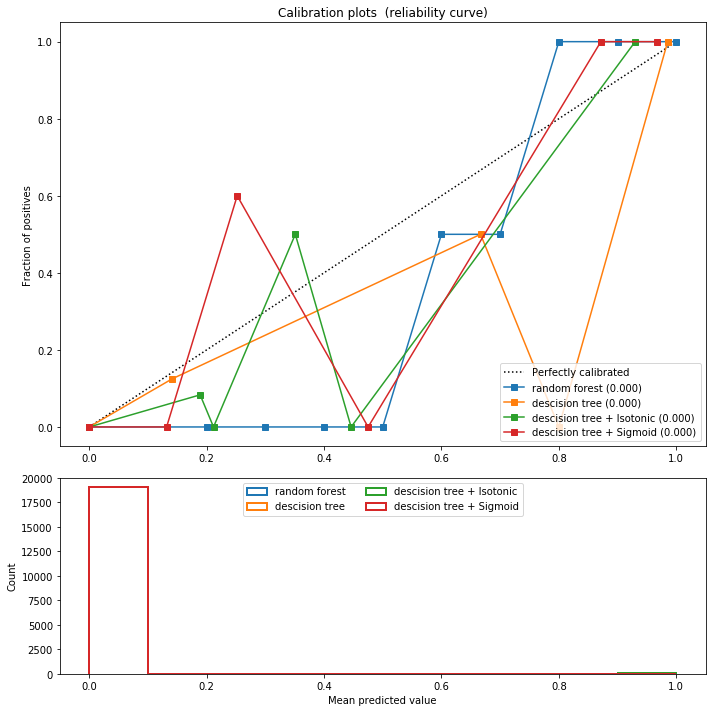

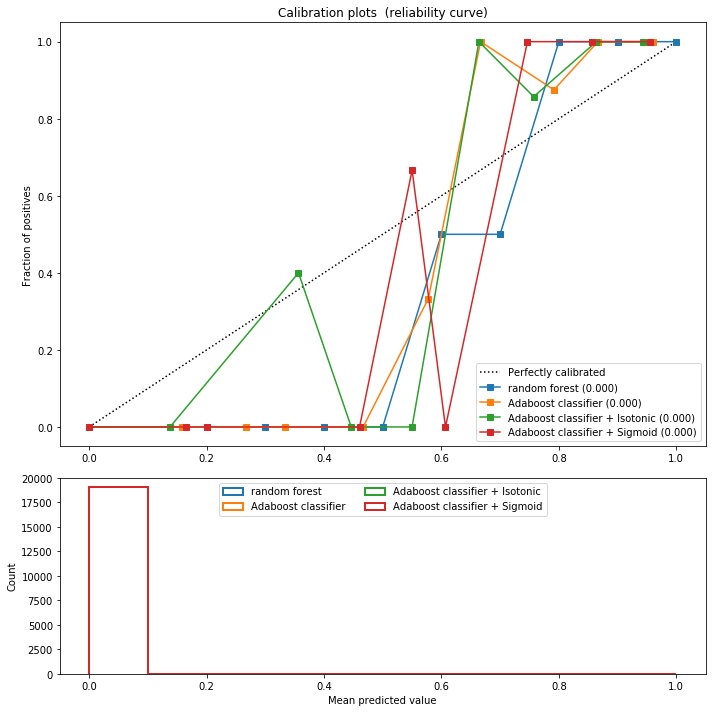

In [85]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

def plot_calibration_curve(est, name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    # Calibrated with isotonic calibration
    isotonic = CalibratedClassifierCV(est, cv=2, method='isotonic')

    # Calibrated with sigmoid calibration
    sigmoid = CalibratedClassifierCV(est, cv=2, method='sigmoid')

    # Logistic regression with no calibration as baseline
    #lr = LogisticRegression(C=1., solver='lbfgs')
    
    randf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for classifier, name in [(randf, 'random forest'),
                      (est, name),
                      (isotonic, name + ' + Isotonic'),
                      (sigmoid, name + ' + Sigmoid')]:
        classifier.fit(xtrain, ytrain)
        y_pred = classifier.predict(xtest)
        if hasattr(classifier, "predict_proba"):
            prob_pos = classifier.predict_proba(xtest)[:, 1]
        else:  # use decision function
            prob_pos = classifier.decision_function(xtest)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        clf_score = brier_score_loss(ytest, prob_pos, pos_label=y.max())
        print("%s:" % name)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tPrecision: %1.3f" % precision_score(ytest, y_pred))
        print("\tRecall: %1.3f" % recall_score(ytest, y_pred))
        print("\tF1: %1.3f\n" % f1_score(ytest, y_pred))

        fraction_of_positives, mean_predicted_value = \
            calibration_curve(ytest, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()

# Plot calibration curve for Gaussian Naive Bayes
plot_calibration_curve(BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
, "bagging classifier", 1)

# Plot calibration curve for Linear SVC
plot_calibration_curve(AdaBoostClassifier(), "Adaboost classifier", 2)

# Plot calibration curve for descision tree classifier
plot_calibration_curve(DecisionTreeClassifier(min_samples_split=15, min_samples_leaf=10, random_state=0, criterion = 'entropy')
, "descision tree", 1)

# Plot calibration curve for Linear SVC
plot_calibration_curve(RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 0), "Adaboost classifier", 2)

plt.show()